## Queries with long relevant articles in the original test set
### <<< All queries are considered, no matter how many relevant articles they have. >>>
The following script is for checking if there are any long articles in the relevant queries. The threshold is set in the notebook "data_inspection"
and can be changed; The following script uses the json map in the data folder "long_article_ids.json" to map the long articles and find them. 
There might be no need for removing them, but in case of removal an extra script can be founf in the "extra_codes.ipynb" notebook.

In [ ]:
from datasets import load_dataset
import json

with open("long_article_ids.json", "r", encoding="utf-8") as f:
    long_article_ids = [str(id).strip() for id in json.load(f)]

ds_test = load_dataset("clips/bBSARD", "test")

test_fr = ds_test['fr']
test_nl = ds_test['nl']


# Check which long articles are cited in the test queries (French)
cited_long_articles_fr = []
for query in test_fr:
    relevant_ids = query['article_ids'].split(",")
    relevant_ids = [id_.strip() for id_ in relevant_ids]  # normalize by stripping spaces
    for doc_id in relevant_ids:
        if doc_id in long_article_ids:
            cited_long_articles_fr.append((query['id'], doc_id))

# Check which long articles are cited in the test queries (Dutch)
cited_long_articles_nl = []
for query in test_nl:
    relevant_ids = query['article_ids'].split(",")
    relevant_ids = [id_.strip() for id_ in relevant_ids]  # normalize by stripping spaces
    for doc_id in relevant_ids:
        if doc_id in long_article_ids:
            cited_long_articles_nl.append((query['id'], doc_id))

unique_queries_fr = set(query_id for query_id, doc_id in cited_long_articles_fr)
unique_long_articles_fr = set(doc_id for query_id, doc_id in cited_long_articles_fr)
num_unique_long_articles_fr = len(unique_long_articles_fr)


unique_queries_nl = set(query_id for query_id, doc_id in cited_long_articles_nl)
unique_long_articles_nl = set(doc_id for query_id, doc_id in cited_long_articles_nl)
num_unique_long_articles_nl = len(unique_long_articles_nl)

# Report results
print(f"French test queries citing long articles: {len(cited_long_articles_fr)}")
print("Examples (Query ID, Long Article ID):")
print(cited_long_articles_fr) 
print("\nNumber of French unique queries citing long articles:", len(unique_queries_fr))
print("List of French unique citing long articles:", unique_queries_fr)
print("\nFrench unique long articles cited:", num_unique_long_articles_fr)
print("List of French long articles cited:", unique_long_articles_fr)

print("\n" + "="*60 + "\n")

print(f"Dutch test queries citing long articles: {len(cited_long_articles_nl)}")
print("Examples (Query ID, Long Article ID):")
print(cited_long_articles_nl) 
print("\nNumber of Dutch unique queries citing long articles:", len(unique_queries_nl))
print("List of Dutch queries citing long articles:", unique_queries_nl)
print("\nDutch unique long articles cited:", num_unique_long_articles_nl)
print("List of Dutch long articles cited:", unique_long_articles_nl)

## Queries with more that 10 relevant articles

In [ ]:
import json
from datasets import load_dataset

# Load long article IDs
with open("long_article_ids.json", "r", encoding="utf-8") as f:
    long_article_ids = [str(id).strip() for id in json.load(f)]

# Load queries with too many relevant articles → skip these
with open("queries_with_many_relevant_articles.json", "r", encoding="utf-8") as f:
    queries_to_remove = json.load(f)

queries_to_remove_fr = set(queries_to_remove["fr"])
queries_to_remove_nl = set(queries_to_remove["nl"])

# Load test sets
ds_test = load_dataset("clips/bBSARD", "test")
test_fr = ds_test['fr']
test_nl = ds_test['nl']

# === French
cited_long_articles_fr = {}

for query in test_fr:
    query_id = query['id']
    if query_id in queries_to_remove_fr:
        continue  # skip queries with too many relevant articles

    relevant_ids = [id_.strip() for id_ in query['article_ids'].split(",")]

    long_cited = [doc_id for doc_id in relevant_ids if doc_id in long_article_ids]

    if long_cited:
        cited_long_articles_fr[str(query_id)] = long_cited

# === Dutch
cited_long_articles_nl = {}

for query in test_nl:
    query_id = query['id']
    if query_id in queries_to_remove_nl:
        continue  # skip queries with too many relevant articles

    relevant_ids = [id_.strip() for id_ in query['article_ids'].split(",")]

    long_cited = [doc_id for doc_id in relevant_ids if doc_id in long_article_ids]

    if long_cited:
        cited_long_articles_nl[str(query_id)] = long_cited

# Combine into one dictionary
cited_long_articles = {
    "fr": cited_long_articles_fr,
    "nl": cited_long_articles_nl
}

with open("queries_citing_long_articles.json", "w", encoding="utf-8") as f:
    json.dump(cited_long_articles, f, ensure_ascii=False, indent=2)

print("Saved queries citing long articles to queries_citing_long_articles.json")
print(f"French queries: {len(cited_long_articles_fr)}")
print(f"Dutch queries: {len(cited_long_articles_nl)}")



print(f"French test queries citing long articles: {len(cited_long_articles_fr)}")
print("Examples (Query ID, Long Article ID):")
print(cited_long_articles_fr) 
print("\nNumber of French unique queries citing long articles:", len(unique_queries_fr))
print("List of French unique citing long articles:", unique_queries_fr)
print("\nFrench unique long articles cited:", num_unique_long_articles_fr)
print("List of French long articles cited:", unique_long_articles_fr)

print("\n" + "="*60 + "\n")

print(f"Dutch test queries citing long articles: {len(cited_long_articles_nl)}")
print("Examples (Query ID, Long Article ID):")
print(cited_long_articles_nl) 
print("\nNumber of Dutch unique queries citing long articles:", len(unique_queries_nl))
print("List of Dutch queries citing long articles:", unique_queries_nl)
print("\nDutch unique long articles cited:", num_unique_long_articles_nl)
print("List of Dutch long articles cited:", unique_long_articles_nl)

## Cleaning the queries data
## Removing article ids of long articles from the relevant articles field
### <<< 1: queries with more than 10 articles will be completely removed >>>
### <<< Long article ids will be removed from the relevant id field. >>>

In [27]:
from datasets import load_dataset

# Load test queries
ds_test = load_dataset("clips/bBSARD", "test")
test_fr = ds_test["fr"]
test_nl = ds_test["nl"]

# Count queries with >10 relevant articles
num_fr_gt10 = sum(
    len([id_.strip() for id_ in query["article_ids"].split(",")]) > 10 
    for query in test_fr
)

num_nl_gt10 = sum(
    len([id_.strip() for id_ in query["article_ids"].split(",")]) > 10 
    for query in test_nl
)

print(f"French queries with >10 relevant articles: {num_fr_gt10}")
print(f"Dutch queries with >10 relevant articles: {num_nl_gt10}")

French queries with >10 relevant articles: 19
Dutch queries with >10 relevant articles: 19


In [28]:
## Cleaning and saving as CSV and dataset.arrow
from datasets import load_dataset, Dataset, DatasetDict
import pandas as pd
import os

# Load test queries
ds_test = load_dataset("clips/bBSARD", "test")
test_fr = ds_test["fr"]
test_nl = ds_test["nl"]

# Cleaning function: ONLY removes queries with >10 relevant articles
def clean_query_set(test_set, lang_label):
    cleaned = []
    for query in test_set:
        relevant_ids = [id_.strip() for id_ in query["article_ids"].split(",")]
        if len(relevant_ids) > 10:
            continue
        cleaned.append(query)
    print(f"Cleaned {len(cleaned)} {lang_label} queries (removed queries with >10 relevant articles).")
    return cleaned

cleaned_fr = clean_query_set(test_fr, "French")
cleaned_nl = clean_query_set(test_nl, "Dutch")

# Save as CSV
os.makedirs("data/cleaned_queries_csv", exist_ok=True)
pd.DataFrame(cleaned_fr).to_csv("data/cleaned_queries_csv/cleaned_test_queries_fr.csv", index=False)
pd.DataFrame(cleaned_nl).to_csv("data/cleaned_queries_csv/cleaned_test_queries_nl.csv", index=False)

# Save as HuggingFace Dataset
ds_cleaned_fr = Dataset.from_list(cleaned_fr)
ds_cleaned_nl = Dataset.from_list(cleaned_nl)

ds_cleaned = DatasetDict({
    "fr": ds_cleaned_fr,
    "nl": ds_cleaned_nl
})

os.makedirs("data/cleaned_queries_ds", exist_ok=True)
ds_cleaned.save_to_disk("data/cleaned_queries_ds/cleaned_test_queries")
print("Saved cleaned test queries to HuggingFace dataset format.")

Cleaned 203 French queries (removed queries with >10 relevant articles).
Cleaned 203 Dutch queries (removed queries with >10 relevant articles).


Saving the dataset (1/1 shards): 100%|██████████| 203/203 [00:00<00:00, 113738.14 examples/s]

Saved cleaned test queries to HuggingFace dataset format.


In [29]:
from datasets import load_from_disk
ds = load_from_disk("data/cleaned_queries_ds/cleaned_test_queries")
print(ds["fr"].shape)
print(ds["nl"].shape)

(203, 6)
(203, 6)


In [30]:
from datasets import load_from_disk
ds = load_from_disk("data/cleaned_queries_ds/cleaned_test_queries")
print(ds["fr"][0])

{'id': 775, 'category': 'Logement', 'subcategory': 'Insalubrité en Wallonie', 'question': "Quels sont les critères communaux d'insalubrité ?", 'extra_description': None, 'article_ids': '11822'}


In [31]:
from datasets import load_from_disk
import random

dataset_path = "data/cleaned_queries_ds/cleaned_test_queries"
ds = load_from_disk(dataset_path)

print(ds)

print("\n--- Random French Queries ---")
fr_samples = random.sample(list(ds["fr"]), k=min(5, len(ds["fr"])))
for i, sample in enumerate(fr_samples, 1):
    print(f"{i}. ID: {sample['id']} | Relevant articles: {sample['article_ids']}")

print("\n--- Random Dutch Queries ---")
nl_samples = random.sample(list(ds["nl"]), k=min(5, len(ds["nl"])))
for i, sample in enumerate(nl_samples, 1):
    print(f"{i}. ID: {sample['id']} | Relevant articles: {sample['article_ids']}")

DatasetDict({
    fr: Dataset({
        features: ['id', 'category', 'subcategory', 'question', 'extra_description', 'article_ids'],
        num_rows: 203
    })
    nl: Dataset({
        features: ['id', 'category', 'subcategory', 'question', 'extra_description', 'article_ids'],
        num_rows: 203
    })
})

--- Random French Queries ---
1. ID: 101 | Relevant articles: 5149,5150,5151,5226,5227,5228
2. ID: 861 | Relevant articles: 5559,5560,5561,5562,5563
3. ID: 1002 | Relevant articles: 873,874,875,876
4. ID: 386 | Relevant articles: 1367,5414
5. ID: 635 | Relevant articles: 6160,6161,6162,6859,6866,6867

--- Random Dutch Queries ---
1. ID: 733 | Relevant articles: 5559,5560,5561,5562,5563
2. ID: 1099 | Relevant articles: 13049,6238
3. ID: 117 | Relevant articles: 5958,5965,5969,5970
4. ID: 935 | Relevant articles: 2836,842
5. ID: 304 | Relevant articles: 1308,1310


## Data analysis of the queries data after cleaning

In [33]:
import pandas as pd

# Load cleaned queries from CSV
df_fr = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_fr.csv")
df_nl = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_nl.csv")

# Compute query lengths (in words)
query_lengths_fr_word = df_fr["question"].apply(lambda x: len(str(x).split()))
query_lengths_nl_word = df_nl["question"].apply(lambda x: len(str(x).split()))

# Create DataFrame with both
df_queries = pd.DataFrame({
    "French Query Length": query_lengths_fr_word,
    "Dutch Query Length": query_lengths_nl_word
})

# Show descriptive stats
print(df_queries.describe())

       French Query Length  Dutch Query Length
count           203.000000          203.000000
mean             15.901478           15.009852
std               6.792552            7.031042
min               5.000000            4.000000
25%              11.000000           10.000000
50%              15.000000           14.000000
75%              20.000000           19.000000
max              41.000000           42.000000


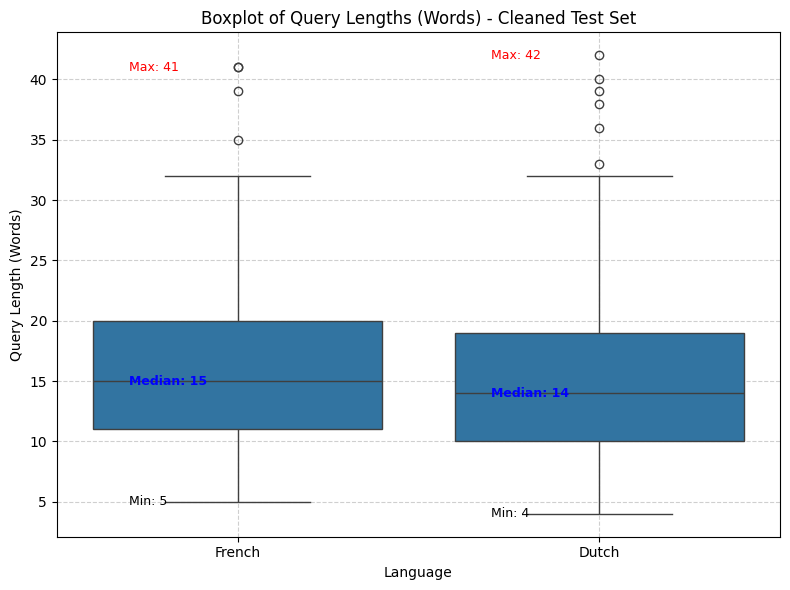

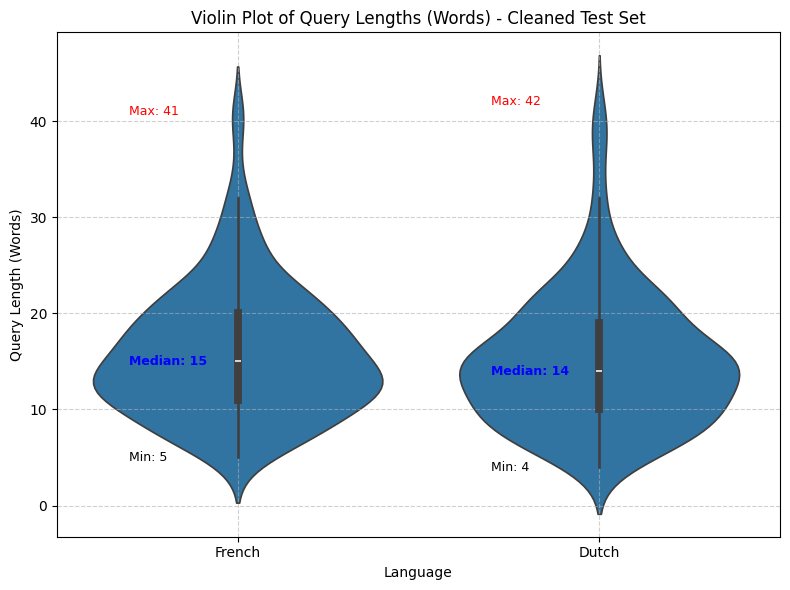

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned queries
df_fr = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_fr.csv")
df_nl = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_nl.csv")

# Compute query lengths
query_lengths_fr_word = df_fr["question"].apply(lambda x: len(str(x).split()))
query_lengths_nl_word = df_nl["question"].apply(lambda x: len(str(x).split()))

# Combine into a single DataFrame
df_word_queries = pd.DataFrame({
    "Length": query_lengths_fr_word.tolist() + query_lengths_nl_word.tolist(),
    "Language": ["French"] * len(query_lengths_fr_word) + ["Dutch"] * len(query_lengths_nl_word)
})

# Compute stats
stats = df_word_queries.groupby("Language")["Length"].agg(["min", "median", "max"])

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Language", y="Length", data=df_word_queries)
plt.title("Boxplot of Query Lengths (Words) - Cleaned Test Set")
plt.ylabel("Query Length (Words)")
plt.grid(True, linestyle='--', alpha=0.6)

for i, language in enumerate(["French", "Dutch"]):
    plt.text(i - 0.3, stats.loc[language, "min"], f"Min: {int(stats.loc[language, 'min'])}",
             color="black", va='center', fontsize=9)
    plt.text(i - 0.3, stats.loc[language, "median"], f"Median: {int(stats.loc[language, 'median'])}",
             color="blue", va='center', fontsize=9, fontweight='bold')
    plt.text(i - 0.3, stats.loc[language, "max"], f"Max: {int(stats.loc[language, 'max'])}",
             color="red", va='center', fontsize=9)

plt.tight_layout()
plt.savefig("plots/query_length_boxplot_word_with_stats_cleaned.png")
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Language", y="Length", data=df_word_queries)
plt.title("Violin Plot of Query Lengths (Words) - Cleaned Test Set")
plt.ylabel("Query Length (Words)")
plt.grid(True, linestyle='--', alpha=0.6)

for i, language in enumerate(["French", "Dutch"]):
    plt.text(i - 0.3, stats.loc[language, "min"], f"Min: {int(stats.loc[language, 'min'])}",
             color="black", va='center', fontsize=9)
    plt.text(i - 0.3, stats.loc[language, "median"], f"Median: {int(stats.loc[language, 'median'])}",
             color="blue", va='center', fontsize=9, fontweight='bold')
    plt.text(i - 0.3, stats.loc[language, "max"], f"Max: {int(stats.loc[language, 'max'])}",
             color="red", va='center', fontsize=9)

plt.tight_layout()
plt.savefig("plots/query_length_violin_word_with_stats_cleaned.png")
plt.show()

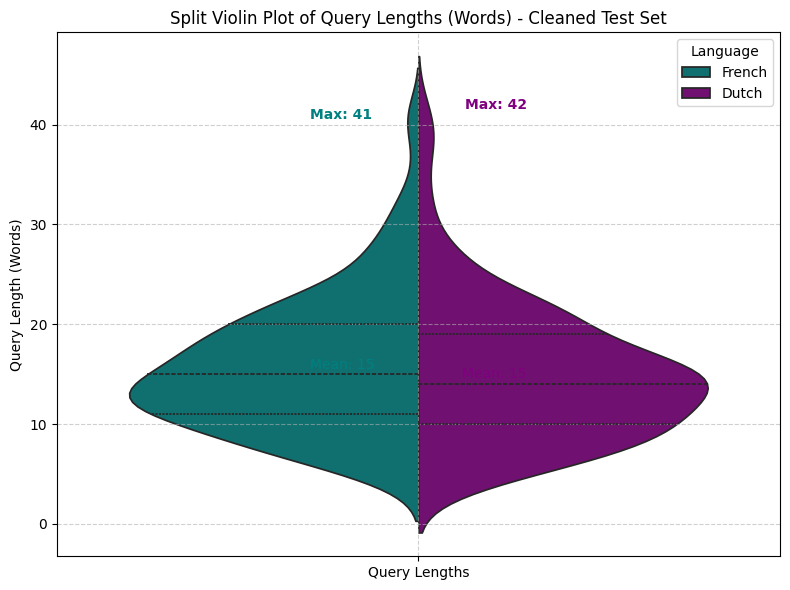

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned queries
df_fr = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_fr.csv")
df_nl = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_nl.csv")

# Compute query lengths
query_lengths_fr_word = df_fr["question"].apply(lambda x: len(str(x).split()))
query_lengths_nl_word = df_nl["question"].apply(lambda x: len(str(x).split()))

# Combine into single DataFrame
df_word_queries = pd.DataFrame({
    "Length": query_lengths_fr_word.tolist() + query_lengths_nl_word.tolist(),
    "Language": ["French"] * len(query_lengths_fr_word) + ["Dutch"] * len(query_lengths_nl_word)
})

# Compute stats
mean_fr = query_lengths_fr_word.mean()
mean_nl = query_lengths_nl_word.mean()
max_fr = query_lengths_fr_word.max()
max_nl = query_lengths_nl_word.max()

# Plot
plt.figure(figsize=(8, 6))

sns.violinplot(
    x=["Query Lengths"] * len(df_word_queries),
    y="Length",
    hue="Language",
    data=df_word_queries,
    split=True,
    inner="quartile",
    palette={"French": "teal", "Dutch": "purple"}
)

plt.text(-0.15, mean_fr, f"Mean: {int(mean_fr)}", color="teal", va='center', ha='left', fontsize=10)
plt.text(-0.15, max_fr, f"Max: {max_fr}", color="teal", va='center', ha='left', fontsize=10, fontweight='bold')

plt.text(0.15, mean_nl, f"Mean: {int(mean_nl)}", color="purple", va='center', ha='right', fontsize=10)
plt.text(0.15, max_nl, f"Max: {max_nl}", color="purple", va='center', ha='right', fontsize=10, fontweight='bold')

plt.title("Split Violin Plot of Query Lengths (Words) - Cleaned Test Set")
plt.ylabel("Query Length (Words)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/query_length_split_violin_word_stats_cleaned.png")
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned queries
df_fr = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_fr.csv")
df_nl = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_nl.csv")

# Count relevant articles per query
relevant_counts_fr = df_fr["article_ids"].apply(lambda x: len([id_.strip() for id_ in str(x).split(",")]))
relevant_counts_nl = df_nl["article_ids"].apply(lambda x: len([id_.strip() for id_ in str(x).split(",")]))

# Combine into DataFrame
df_stats_queries = pd.DataFrame({
    "French Relevant Articles Count": relevant_counts_fr,
    "Dutch Relevant Articles Count": relevant_counts_nl
})

# Show descriptive stats
print(df_stats_queries.describe())

       French Relevant Articles Count  Dutch Relevant Articles Count
count                      203.000000                     203.000000
mean                         2.551724                       2.551724
std                          2.002729                       2.002729
min                          1.000000                       1.000000
25%                          1.000000                       1.000000
50%                          2.000000                       2.000000
75%                          3.000000                       3.000000
max                         10.000000                      10.000000


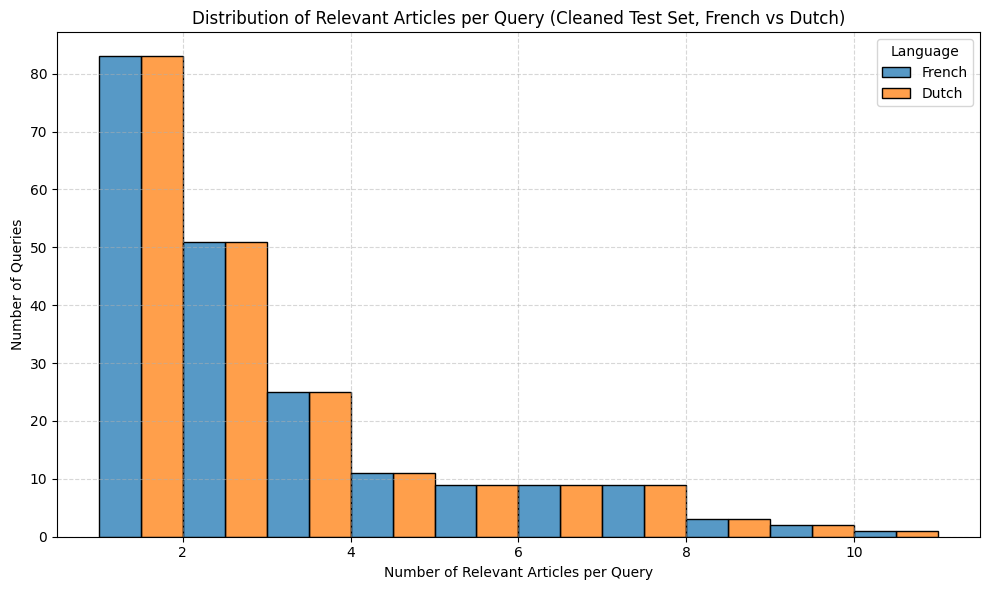

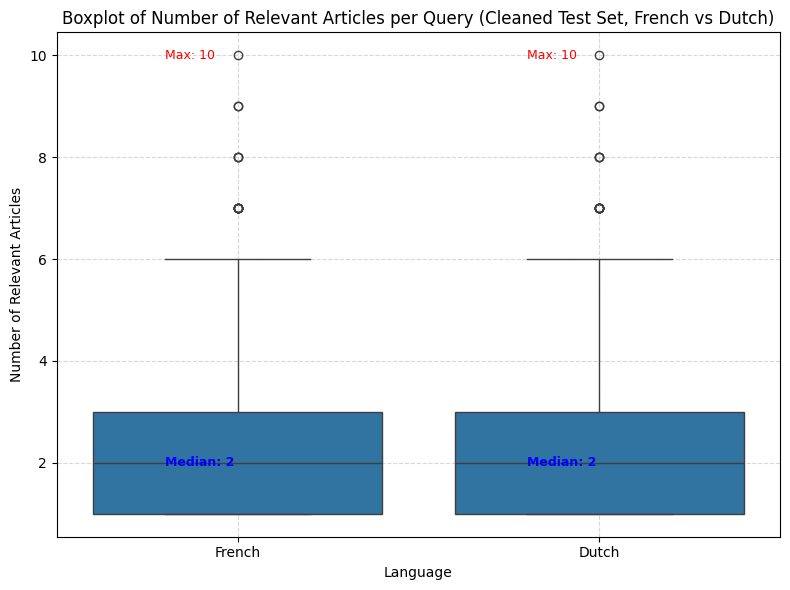

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("plots", exist_ok=True)

# Load cleaned queries
df_fr = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_fr.csv")
df_nl = pd.read_csv("data/cleaned_queries_csv/cleaned_test_queries_nl.csv")

# Compute relevant article counts
relevant_counts_fr = df_fr["article_ids"].apply(lambda x: len([id_.strip() for id_ in str(x).split(",")]))
relevant_counts_nl = df_nl["article_ids"].apply(lambda x: len([id_.strip() for id_ in str(x).split(",")]))

# Combine into one DataFrame
df = pd.DataFrame({
    "Count": relevant_counts_fr.tolist() + relevant_counts_nl.tolist(),
    "Language": ["French"] * len(relevant_counts_fr) + ["Dutch"] * len(relevant_counts_nl)
})

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, x="Count", hue="Language", multiple="dodge",
    bins=range(1, df["Count"].max() + 2), edgecolor="black"
)
plt.title("Distribution of Relevant Articles per Query (Cleaned Test Set, French vs Dutch)")
plt.xlabel("Number of Relevant Articles per Query")
plt.ylabel("Number of Queries")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("plots/num_rel_articles_histogram_cleaned.png")
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Language", y="Count", data=df)

plt.title("Boxplot of Number of Relevant Articles per Query (Cleaned Test Set, French vs Dutch)")
plt.ylabel("Number of Relevant Articles")
plt.grid(True, linestyle="--", alpha=0.5)

stats = df.groupby("Language")["Count"].agg(["min", "median", "max"])

for i, language in enumerate(["French", "Dutch"]):
    plt.text(
        i - 0.2, stats.loc[language, "median"],
        f"Median: {int(stats.loc[language, 'median'])}",
        color="blue", va='center', fontsize=9, fontweight='bold'
    )
    plt.text(
        i - 0.2, stats.loc[language, "max"],
        f"Max: {int(stats.loc[language, 'max'])}",
        color="red", va='center', fontsize=9
    )

plt.tight_layout()
plt.savefig("plots/num_rel_articles_boxplot_cleaned.png")
plt.show()